In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#this file contains judges attributes and their ideology
#negative ideology score = liberal, positive ideology score = conservative
#zero is the approximately the median/centrist score
judges = pd.read_csv("Judge Attribute and Ideology.csv")

#ideology data are not consistent before 1950 or so
judges = judges[judges["Year of Appointment"] > 1950]


#rescaling the ideology variable for presentation
judges["Ideology Score"] = 100*judges["Ideology Score"]

#the absolute value of the ideology score measures a judge's distance from the ideological centre
judges["Absolute Ideology"] = abs(judges["Ideology Score"])

#the dataset includes attributes of judges including:
#gender, race, age, politican party, past experience (including in politics)
judges.head()

In [5]:
#to provide motivation for our analysis, we will create a graph
#showing how the average ideology of judges shifts over time 

year_ideology = judges.groupby("Year of Appointment")[["Absolute Ideology","Ideology Score"]].mean()
year_ideology.reset_index(inplace = True)


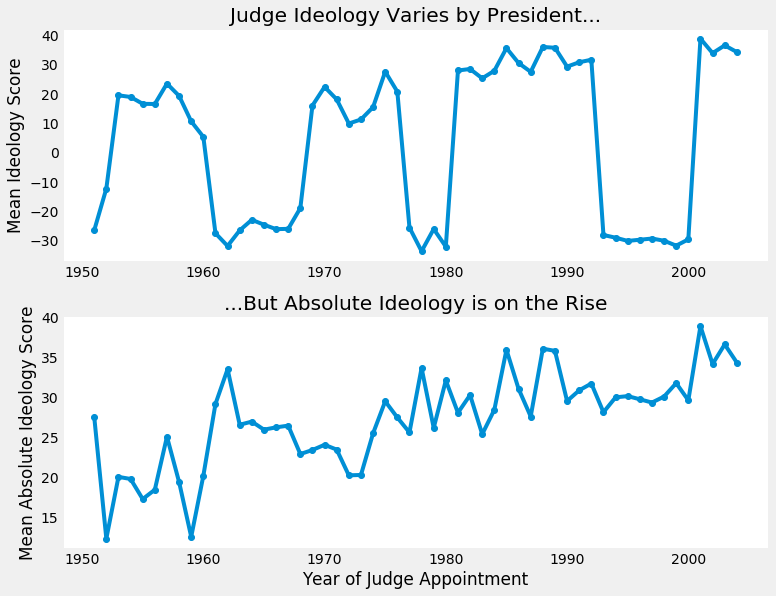

In [20]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(2,1,figsize=(11,8.5))

# Hide grid lines, set a white face color, and set yaxis label
for counter, value in enumerate(["Mean Ideology Score","Mean Absolute Ideology Score"]):
    ax[counter].set_facecolor('white')
    ax[counter].grid(False)
    ax[counter].set_ylabel(value)
    
for counter, value in enumerate(["Ideology Score","Absolute Ideology"]):
    ax[counter].plot(year_ideology["Year of Appointment"],
                    year_ideology[value],"-o")
      
ax[0].set_title("Judge Ideology Varies by President...")   
ax[1].set_title("...But Absolute Ideology is on the Rise")

ax[1].set_xlabel("Year of Judge Appointment")


#fig.text(.2, 0.03, "*Mean Score of Judges ", ha='center',fontsize=14)


fig.tight_layout()


In [19]:
#the graph above showed judges have become more ideological.
#our next question is whether this trend occurred in Democratic judges,  Republican judges, or both?

#since ideology varies so much based on the president in power, we'll look at the judge's year of birth,
#rather than year of appointment to see whether newer judges are more ideoligical than older ones

age_ideology = judges.groupby(["Year of Birth","Judge Party"])[["Ideology Score","Absolute Ideology"]].mean()
age_ideology.reset_index(inplace = True)


Text(0, 0.5, 'Mean Ideology Score')

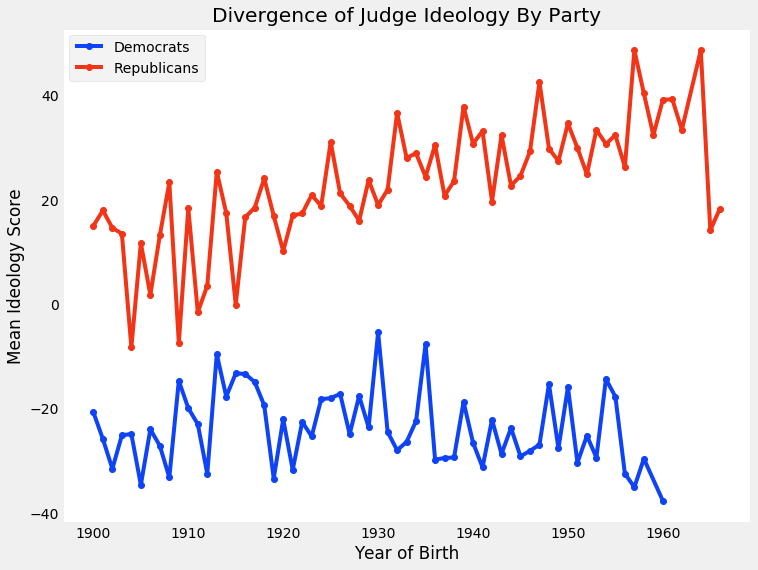

In [30]:
fig, ax = plt.subplots(figsize=(11,8.5))

ax.set_facecolor('white')
ax.grid(False)


initial_age = 1900

recent = age_ideology["Year of Birth"] >= initial_age

democrats = age_ideology["Judge Party"] == "Democrat"
republicans = age_ideology["Judge Party"] == "Republican"

ax.plot(age_ideology[democrats & recent]["Year of Birth"],
        age_ideology[democrats & recent]["Ideology Score"],"-o",label="Democrats",color="#0e44f5")

ax.plot(age_ideology[republicans & recent]["Year of Birth"],
        age_ideology[republicans & recent]["Ideology Score"],"-o",label="Republicans",color="#f23417")


ax.legend()
ax.set_title("Divergence of Judge Ideology By Party")

ax.set_xlabel("Year of Birth")
ax.set_ylabel("Mean Ideology Score")
#fig.tight_layout()

In [ ]:
#now we turn to whether attributes of a judge can explain their ideology

import sklearn

from sklearn import (
    linear_model, metrics, neural_network, pipeline,
    model_selection, tree
)

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
